In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy

##### 생선의 무게와 크기를 생선 분류
 - 데이터셋 : fish.csv
 - 피쳐/ 입력데이터 : Weight, Length
 - 타겟/ 클라스/ 출력 : Species
 - 기계학습 방법 : 지도학습 ==> 분류
 - 분류 알고리즘(문제해결방법) : 미정
 

In [91]:
# 1. 데이터 살펴보기
# 데이터 준비

# 경로  >  상대경로 ,  절대경로
# 상대 경로 : 현재 파일을 기준으로 경로를 설정
# - ./: 의미 현재 위치 의미
# - ../: 상위 즉, 한단걔 위의 위치 의미

DATA_File = '../data/fish.csv'


# 절대 결로 : 드라이브(C,D,E...)를 기준으로 경로를 설정 (file path copy 사용)
DATA_File1 = r'C:\Users\KDP-23\Desktop\KDT6\M_L\data\fish.csv'



In [92]:
# CSV >> 데이터 프레임으로
# 첫번쨋줄 : 컬럼명 존재
# 구분자 :  쉼표
# 로딩 컬럼: Species,Weight,Length 즉 0,1,2
fishDF = pd.read_csv(DATA_File, usecols=[0,1,2])# 컬럼명도 가능
# fishDF = pd.read_csv(DATA_File, usecols=['Species','Weight','Length'])# 컬럼명도 가능

In [93]:
fishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [94]:
# 데이터 확인
fishDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [95]:
# 컬럼별 결측치 체크
# 현재 상태에서는 isnull로 확인불거 info만으로는 신뢰하기 어려움
# 컬럼별 고유값 체트 ==> 개수
fishDF['Species']


0      Bream
1      Bream
2      Bream
3      Bream
4      Bream
       ...  
154    Smelt
155    Smelt
156    Smelt
157    Smelt
158    Smelt
Name: Species, Length: 159, dtype: object

In [96]:
fishDF.value_counts()

Species    Weight  Length
Roach      160.0   22.5      2
Perch      120.0   22.0      2
Bream      600.0   32.0      2
           700.0   33.0      2
           242.0   25.4      1
                            ..
Perch      100.0   18.0      1
           110.0   21.0      1
                   22.0      1
           115.0   21.0      1
Whitefish  1000.0  40.0      1
Name: count, Length: 155, dtype: int64

In [97]:
# 컬럼별 중복값 체크
# > 길이와 무게 같다고해서 높이, 넓이, 대각선 길이가 값지 않음
# >> 중복데이터를 유지

## 이렇게 데이터 확인은 끝!!

In [98]:
# 2. 피쳐와 타겟의 관계, 피쳐와 피쳐의 관계
# 피쳐와 타겟의 관계 ==> 어느정도의 연관성이 있는지 확인
# >> 상관계수로 확인
# >> object type의 품종을 int로 변환한 컬럼을 추가 'S_Code'
fishDF['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [99]:
names = fishDF['Species'].unique().tolist() # 고유값을 뺀거 and # ndarrey == > list 형 변환
{ name:idx for idx, name in enumerate(names) } # 딕셔너리 컨프리헨션 dict comprehenstion

{'Bream': 0,
 'Roach': 1,
 'Whitefish': 2,
 'Parkki': 3,
 'Perch': 4,
 'Pike': 5,
 'Smelt': 6}

In [100]:
# fishDF['Species'].str.replace()

In [101]:
fishDF['Species'].replace({'Bream':1,
                          'Roach':2, 
                          'Whitefish':3, 
                          'Parkki':4, 
                          'Perch':5, 
                          'Pike':6, 
                          'Smelt':7})

0      1
1      1
2      1
3      1
4      1
      ..
154    7
155    7
156    7
157    7
158    7
Name: Species, Length: 159, dtype: int64

In [102]:
#컬럼 추가
values = {'Bream':1,
        'Roach':2, 
        'Whitefish':3, 
        'Parkki':4, 
        'Perch':5, 
        'Pike':6, 
        'Smelt':7}

fishDF['Code'] = fishDF['Species'].replace(values)

In [103]:
fishDF

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
...,...,...,...,...
154,Smelt,12.2,12.2,7
155,Smelt,13.4,12.4,7
156,Smelt,12.2,13.0,7
157,Smelt,19.7,14.3,7


In [104]:
# 7가지 종류에 대한 상관계수
fishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.918618,-0.176783
Length,0.918618,1.000000,-0.118425
Code,-0.176783,-0.118425,1.000000


In [105]:
# 도미(Bream) ,빙어(Smelt) 에 대한 상관계수
mask = (fishDF['Species']=='Bream') | (fishDF['Species']=='Smelt')
twofishDF = fishDF[mask]
twofishDF.corr(numeric_only=True)

,Weight,Length,Code
Weight,1.000000,0.960347,-0.843828
Length,0.960347,1.000000,-0.944132
Code,-0.843828,-0.944132,1.000000


In [106]:
twofishDF

,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1
5,Bream,450.0,29.7,1
6,Bream,500.0,29.7,1
7,Bream,390.0,30.0,1
8,Bream,450.0,30.0,1
9,Bream,500.0,30.7,1


In [107]:
# 피쳐 >> 조건, 규칙, 패턴   
# 타겟 >> 결과              라 생각하면 됨

In [108]:
twofishDF.loc[145: ,'Weight'], twofishDF.loc[145: ,'Length']

(145     6.7
 146     7.5
 147     7.0
 148     9.7
 149     9.8
 150     8.7
 151    10.0
 152     9.9
 153     9.8
 154    12.2
 155    13.4
 156    12.2
 157    19.7
 158    19.9
 Name: Weight, dtype: float64,
 145     9.8
 146    10.5
 147    10.6
 148    11.0
 149    11.2
 150    11.3
 151    11.8
 152    11.8
 153    12.0
 154    12.2
 155    12.4
 156    13.0
 157    14.3
 158    15.0
 Name: Length, dtype: float64)

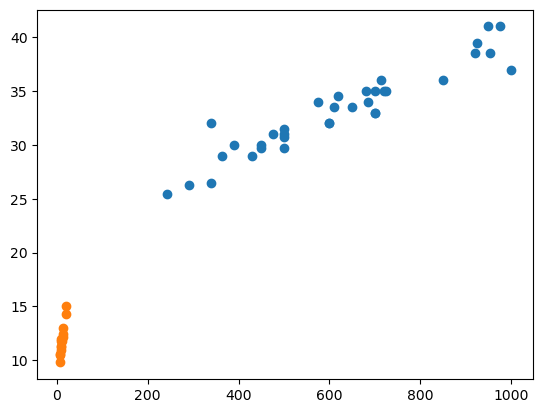

In [109]:
# 도미(Bream) ,빙어(Smelt)에 대한 시각화 >> 2개 핓쳐 Weight, Length로 Bream, Smelt 분류 가능 
plt.scatter(twofishDF.loc[:34 ,'Weight'], twofishDF.loc[:34 ,'Length']) # 도미
plt.scatter(twofishDF.loc[145: ,'Weight'], twofishDF.loc[145: ,'Length']) # 빙어
plt.show()

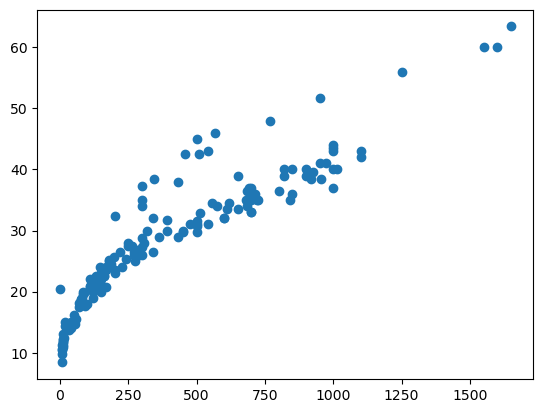

In [110]:
plt.scatter(fishDF.loc[: ,'Weight'], fishDF.loc[: ,'Length'])
plt.show()

#### 3. 학습 훈련 진행
 - 지도 학습 == >  분류
 - ML프레임워크 == > Scikit-learn을 사용
 - 학습알고리즘 == > 최근접 이웃 알고리즘 KNN을 이용

In [111]:
# 모듈 로딩
from sklearn.neighbors import KNeighborsClassifier

In [112]:
# 1. 학습 인스턴스 생성 == > 클래스 명(매개변수 값)
model = KNeighborsClassifier()

In [113]:
print(model, model.n_neighbors) # ERROR :  model.classes_)

KNeighborsClassifier() 5


In [114]:
# 2. 학습/훈련 진행
# model.fit(피쳐2D, 타겟 1D)

features = twofishDF[['Weight','Length']]
target = twofishDF['Code']
print(f'features.shape: {features.shape}, {features.ndim}D')
print(f'target.shape: {target.shape}, {target.ndim}D')

features.shape: (49, 2), 2D
target.shape: (49,), 1D


In [115]:
model.fit(features, target)

KNeighborsClassifier()

In [116]:
# 모델 파라미터(Model Parameter) : 학습 후 설정되는 속성
# - 파라미터 이름 뒤에 XXX_ 
print(model.classes_, model.feature_names_in_)

[1 7] ['Weight' 'Length']


#### 4 테스트 (검증)
 - KNN은 모델 즉 규칙 및 패턴이 생성x
 - 검증 데이터가 입력이 되면 학습 데이터와 거리 측정
 - 지정된 K개수 만큼 검증 데이터와 가까운 데이터를 도출
 - 분류일 경우 K개수 데이터가 가진 라벨/타겟/클래스에 따라 다수결로 결정

In [117]:
# 검증
twofishDF.head()


,Species,Weight,Length,Code
0,Bream,242.0,25.4,1
1,Bream,290.0,26.3,1
2,Bream,340.0,26.5,1
3,Bream,363.0,29.0,1
4,Bream,430.0,29.0,1


In [129]:
# 검증 데이터와 타겟
data = twofishDF.loc[[0],['Weight','Length']]
target = twofishDF.loc[0,'Code']

data.shape, data.ndim, target.shape, target.ndim

((1, 2), 2, (), 0)

In [126]:
# 새로운 데이터에 대해서 결과를 예측
pre_target = model.predict(data)
pre_target

array([1], dtype=int64)

In [127]:
pre_target[0] == target

True

In [128]:
target == pre_target

array([ True])

In [132]:
#--------------------------------------------

# 검증할 데이터 5개씩 준비
data = twofishDF.loc[:4,['Weight','Length']]
target = twofishDF.loc[:4,'Code']

data.shape, data.ndim, target.shape, target.ndim

((5, 2), 2, (5,), 1)

In [135]:
pre_target = model.predict(data)
pre_target

array([1, 1, 1, 1, 1], dtype=int64)

In [137]:
pre_target == target

0    True
1    True
2    True
3    True
4    True
Name: Code, dtype: bool

In [139]:
### 위에 하는걸 해주는 메서드 score()
# 예측 결과와 정답을 비교해서 정수로 도출
# model.score(2D피쳐, 1D타겟)
# 결과 - 0.0~ 1.0 
model.score(data, target)

1.0